# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | pandan
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | mejit
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | tidjikja
Processing Record 9 of Set 1 | puerto armuelles
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | saudarkrokur
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | antonio enes
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | olinda
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | papao
Processing Record 23 of

Processing Record 39 of Set 4 | west island
Processing Record 40 of Set 4 | luau
Processing Record 41 of Set 4 | minggang
Processing Record 42 of Set 4 | abbeville
Processing Record 43 of Set 4 | taman rajawali
City not found. Skipping...
Processing Record 44 of Set 4 | gladstone
Processing Record 45 of Set 4 | san luis de la loma
Processing Record 46 of Set 4 | kerikeri
Processing Record 47 of Set 4 | yagry
City not found. Skipping...
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | tazovsky
Processing Record 0 of Set 5 | cabedelo
Processing Record 1 of Set 5 | whitehorse
Processing Record 2 of Set 5 | ruiz
Processing Record 3 of Set 5 | barakani
Processing Record 4 of Set 5 | qurayyat
Processing Record 5 of Set 5 | callao
Processing Record 6 of Set 5 | gassol
Processing Record 7 of Set 5 | constantia
Processing Record 8 of Set 5 | ixtapa
Processing Record 9 of Set 5 | beylikova
Processing Record 10 of Set 5 | gadzhiyevo
Processing Record 11 of Set 5 | port 

Processing Record 32 of Set 8 | shingu
Processing Record 33 of Set 8 | ciudad lazaro cardenas
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | la sarre
Processing Record 36 of Set 8 | whakatane
Processing Record 37 of Set 8 | sosnovo-ozerskoye
Processing Record 38 of Set 8 | lubao
Processing Record 39 of Set 8 | tindouf
Processing Record 40 of Set 8 | alesund
Processing Record 41 of Set 8 | tabou
Processing Record 42 of Set 8 | les cayes
Processing Record 43 of Set 8 | ust'-kut
Processing Record 44 of Set 8 | abong mbang
Processing Record 45 of Set 8 | badger
Processing Record 46 of Set 8 | we
City not found. Skipping...
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | punta del este
Processing Record 49 of Set 8 | korotchaevo
City not found. Skipping...
Processing Record 0 of Set 9 | maunabo
Processing Record 1 of Set 9 | ejido benito juarez
City not found. Skipping...
Processing Record 2 of Set 9 | hanzhong
Processing Record

Processing Record 22 of Set 12 | ghat
Processing Record 23 of Set 12 | siwa oasis
Processing Record 24 of Set 12 | domna
Processing Record 25 of Set 12 | rawson
Processing Record 26 of Set 12 | luwuk
Processing Record 27 of Set 12 | nizhnesortymskiy
Processing Record 28 of Set 12 | praia
Processing Record 29 of Set 12 | revda
Processing Record 30 of Set 12 | inarajan village
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | haapsalu
Processing Record 33 of Set 12 | nagqu
Processing Record 34 of Set 12 | pontevedra
Processing Record 35 of Set 12 | medias
Processing Record 36 of Set 12 | balikpapan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,28.97,79,20,1.03,MY,1684953084
1,isafjordur,66.0755,-23.1240,6.02,49,100,6.17,IS,1684953092
2,pandan,14.0453,124.1694,26.89,84,65,1.62,PH,1684953093
3,waitangi,-43.9535,-176.5597,11.22,57,23,5.71,NZ,1684953093
4,st. john's,47.5649,-52.7093,12.38,80,20,3.09,CA,1684952905


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,28.97,79,20,1.03,MY,1684953084
1,isafjordur,66.0755,-23.1240,6.02,49,100,6.17,IS,1684953092
2,pandan,14.0453,124.1694,26.89,84,65,1.62,PH,1684953093
3,waitangi,-43.9535,-176.5597,11.22,57,23,5.71,NZ,1684953093
4,st. john's,47.5649,-52.7093,12.38,80,20,3.09,CA,1684952905


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

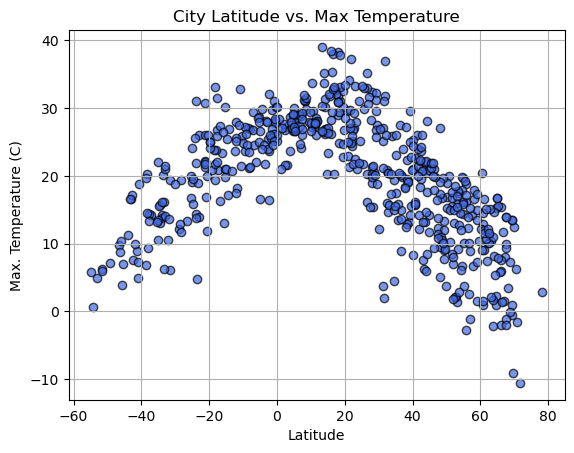

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color='royalblue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

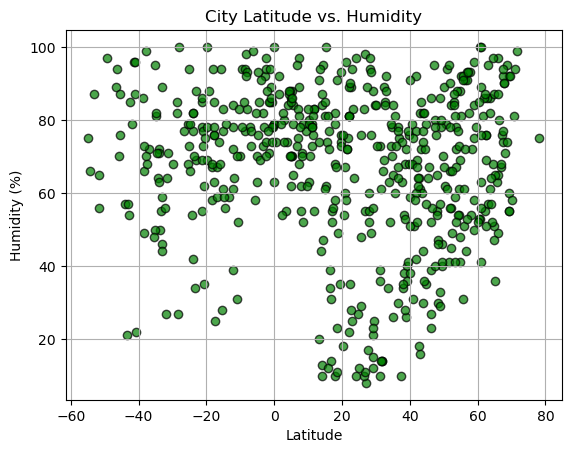

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color='green', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

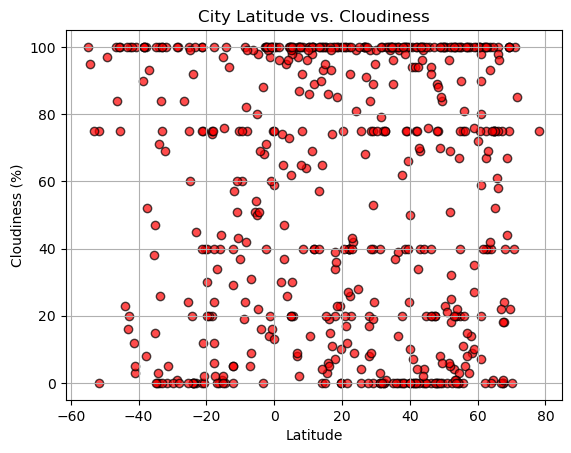

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color='red', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

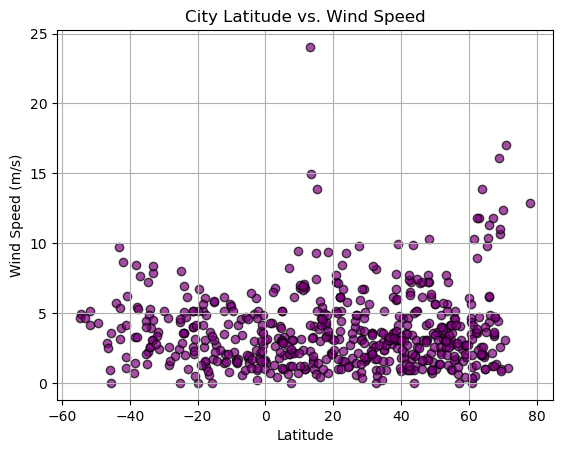

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color='purple', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,28.97,79,20,1.03,MY,1684953084
1,isafjordur,66.0755,-23.1240,6.02,49,100,6.17,IS,1684953092
2,pandan,14.0453,124.1694,26.89,84,65,1.62,PH,1684953093
4,st. john's,47.5649,-52.7093,12.38,80,20,3.09,CA,1684952905
5,mejit,10.2753,170.8646,27.25,80,100,6.81,MH,1684953094


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,11.22,57,23,5.71,NZ,1684953093
6,adamstown,-25.0660,-130.1015,24.06,73,100,4.37,PN,1684953094
10,chonchi,-42.6128,-73.8092,7.56,85,100,3.96,CL,1684953095
13,antonio enes,-16.2325,39.9086,23.30,74,0,3.67,MZ,1684953096
15,olinda,-8.0089,-34.8553,26.85,83,75,4.12,BR,1684953074


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 9.996868373918884e-88
The r-value is: -0.7931149457446632


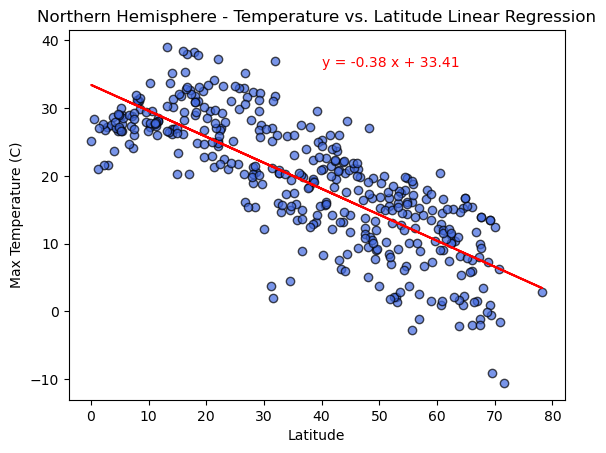

In [15]:
# Linear regression on Northern Hemisphere

(slope, intercept,rvalue, pvalue, stderr)=linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
regress_values=northern_hemisphere_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(40,36), fontsize=10, color='red')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], marker="o", color='royalblue', edgecolor='black', alpha=0.7)
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig5.png")

plt.show()


The p-value is: 3.0659922381989513e-37
The r-value is: 0.7979943381316392


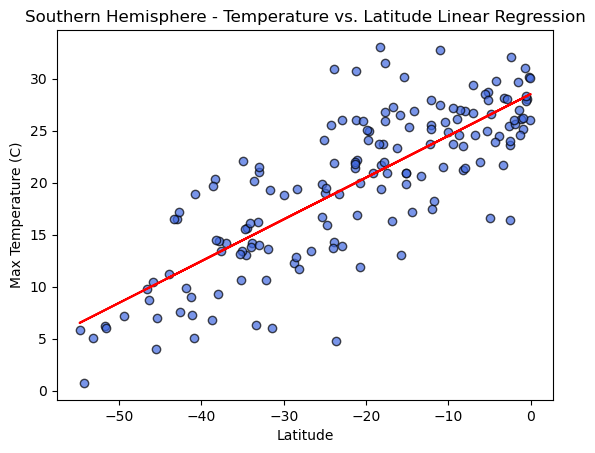

In [16]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)=linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
regress_values=southern_hemisphere_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(-30,280), fontsize=10, color='red')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], marker="o", color='royalblue', edgecolor='black', alpha=0.7)
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig6.png")                    

plt.show()

**Discussion about the linear relationship:

Linear regression shows what happens to the temperature as the latitude increases. 
The latitude increases as you move further away from the equator in the Northern Hemisphere, whereas the latitude decreases as you move further away from the equator in the Southern Hemisphere.
There is a negative correlation between latitude and the max temperature in the Northern Hemisphere, and a positive correlation in the Southern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The p-value is: 0.37396068517617864
The r-value is: 0.04457133494993172


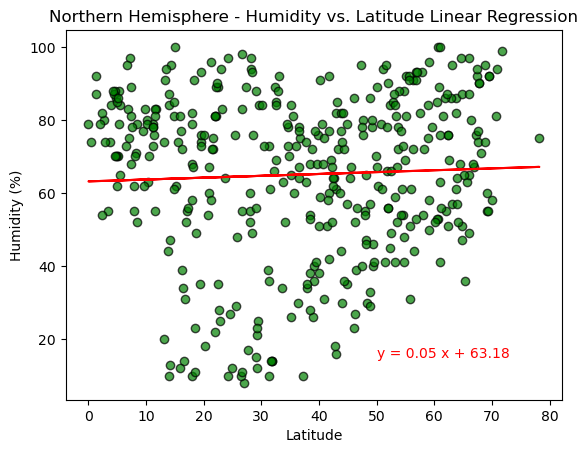

In [17]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)=linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
regress_values=northern_hemisphere_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(50,15), fontsize=10, color='red')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], marker="o", color='green', edgecolor='black', alpha=0.7)
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig7.png")

plt.show()

The p-value is: 0.011231649931356174
The r-value is: 0.19814038966069028


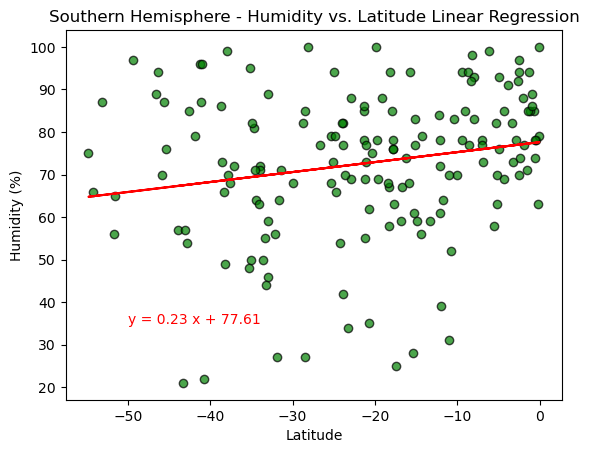

In [18]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
regress_values = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(-50,35), fontsize=10, color='red')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], marker="o", color='green', edgecolor='black', alpha=0.7)
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:

In the Northern Hemisphere, as the latitude increases, so does the humidity, which states that there is a positive correlation.
However, the linear regression in the Southern Hemisphere, shows no significant correlation between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 0.03600555388795971
The r-value is: -0.10488214722929466


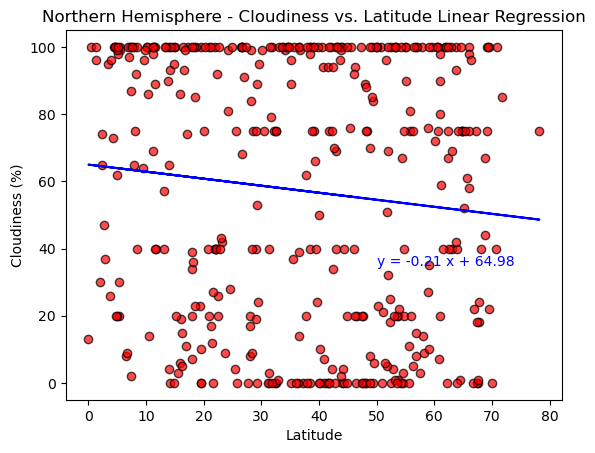

In [19]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
regress_values = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(50,35), fontsize=10, color='blue')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], marker="o", color='red', edgecolor='black', alpha=0.7)
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='blue')

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig9.png")

plt.show()

The p-value is: 0.7381573536659078
The r-value is: -0.02638244274726965


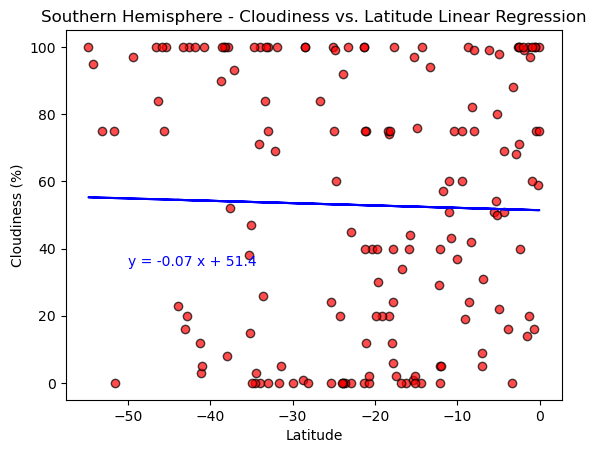

In [20]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
regress_values = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(-50,35), fontsize=10, color='blue')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], marker="o", color='red', edgecolor='black', alpha=0.7)
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='blue')

plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:

In both the Northern and Southern Hemispheres, the correlation between latitude and cloudiness, are not as significant. The Northern Hemisphere shows a slightly more positive correlation as the latitude and cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.09676014454806751
The r-value is: 0.0831547423124326


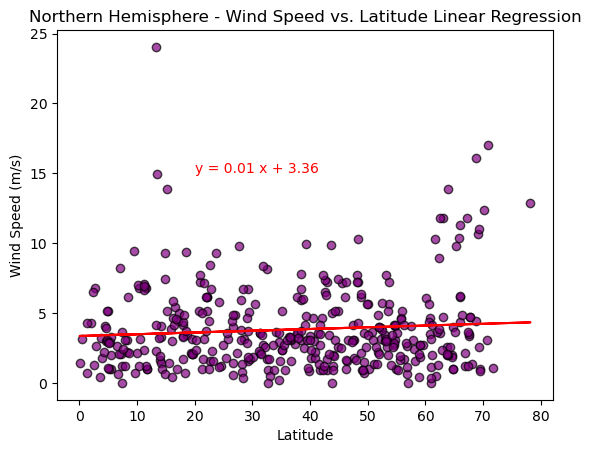

In [21]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
regress_values = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(20,15), fontsize=10, color='red')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], marker="o", color='purple', edgecolor='black', alpha=0.7)
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig11.png")

plt.show()

The p-value is: 0.0007056749552043827
The r-value is: -0.26266595887106525


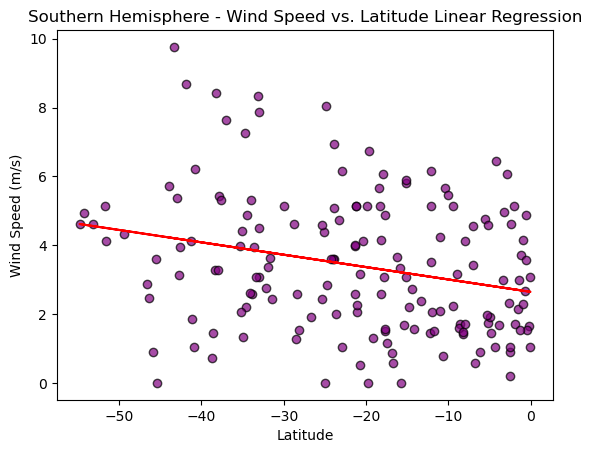

In [22]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
regress_values = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(-50,15), fontsize=10, color='red')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], marker="o", color='purple', edgecolor='black', alpha=0.7)
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:

Much like the cloudiness, the correlation between latitude and wind speed are quite weak. However, there is a slightly more significant increase in latitude and wind speed in the Northern Hemisphere, based on the p-value.